In [233]:
# Import our libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
# This helps to plot some smooth curves
from scipy.interpolate import make_interp_spline

In [234]:
# (PART A) Create the training dataset TODO: MAKE THESE FANCY LABELS IN JUPYTER
training_set = np.linspace(0, 1, 10)

y_indices_training = np.zeros(10)
print(training_set)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


In [235]:
# Create the testing dataset 
sine = []
target_set = []

# populate the sine graph for visualization 
# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
print(target_set)

[-0.06450740190027672, 1.064142577731682, 1.575353549874712, 1.0574955257637806, 0.43333588954681546, -0.3194380389020768, -0.8008699726693457, -1.3746565133839725, -0.4525382035341571, 0.46858715003756146]


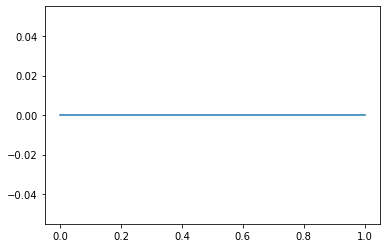

In [236]:
# (PART B) Curve Fitting
# First, plot the training data...
plt.plot(training_set, y_indices_training)


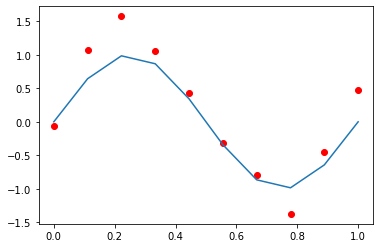

In [237]:
# ... Then plot the actual model
plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')

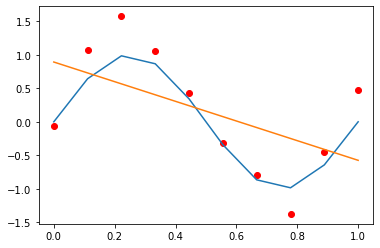

In [239]:
# Curve fitting (learned model) 
# plotting a model with complexity M = 1
model_1 = np.polyfit(training_set, target_set, 1)
poly_1 = np.poly1d(model_1)

# This is an example of underfitting 
plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_1(training_set))

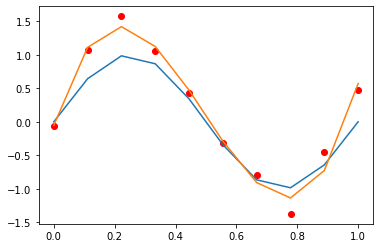

In [240]:
# plotting a model with complexity M = 3
model_3 = np.polyfit(training_set, target_set, 3)
poly_3 = np.poly1d(model_3)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_3(training_set))

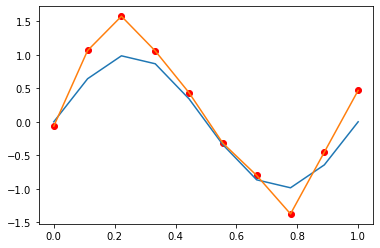

In [241]:
# plotting a model with complexity M = 9
model_9 = np.polyfit(training_set, target_set, 9)
poly_9 = np.poly1d(model_9)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly_9(training_set))

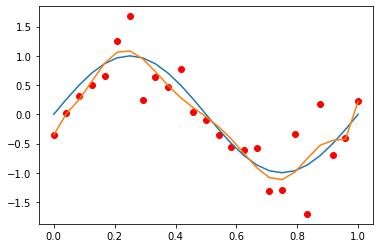

In [242]:
# Now to test complexity M = 9 with varying data set sizes
# N = 25
training_set = np.linspace(0, 1, 25)

sine = []
target_set = []

# populate the sine graph for visualization 
# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))

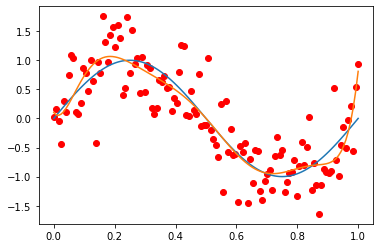

In [243]:
# N = 125
training_set = np.linspace(0, 1, 125)

sine = []
target_set = []

# populate the sine graph for visualization 
# populate the target set (adding a gaussian distribution to sin(2pi(x))) 
for num in training_set:
    sine.append(np.sin(2*np.pi*num))
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
model = np.polyfit(training_set, target_set, 9)
poly = np.poly1d(model)

plt.plot(training_set, sine)
plt.scatter(training_set, target_set, color = 'red')
plt.plot(training_set, poly(training_set))



[-0.29939205 -0.29939205 -0.29939205 -0.29939205 -0.29939205 -0.29939205
 -0.29939205 -0.29939205 -0.29939205 -0.29939205]

training at (1)
0.35606367032969577

training at (2)
0.312696551357839

training at (3)
0.686762912948646

training at (4)
0.3142860788889723

training at (5)
0.45104938183305116

training at (6)
0.5128181752176759

training at (7)
2.3338492886966935

training at (8)
9.768087882194915e-06

training at (9)
0.015645997180855704


[ 0.28992338  0.1589644   0.02800541 -0.10295357 -0.23391256 -0.36487154
 -0.49583053 -0.62678951 -0.7577485  -0.88870748]

training at (1)
0.019141901965605987

training at (2)
0.05372906379671241

training at (3)
0.39976929965313224

training at (4)
0.24515643358999092

training at (5)
0.3673846164911939

training at (6)
0.2700618611814525

training at (7)
1.4407120397100122

training at (8)
0.20723531115419297

training at (9)
0.5103664909732726


[ 0.49454527  0.22717169 -0.00609824 -0.20526452 -0.37032715 -0.50128614
 -0.59814147 -0.

C:\Users\angel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


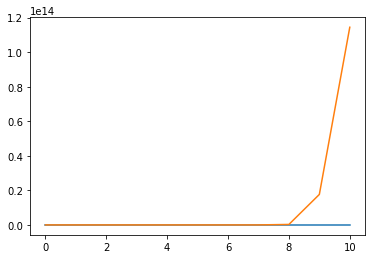

In [244]:
# (PART C) Model Selection 
RMS_training_plot = []
RMS_testing_plot = []

N = 10
training_set = np.linspace(0, 1, N)
# New indpendent test set to compute RMS error on 
test_set = [0.2, 1.7, 2.6, 3.2, 4.4, 5.1, 6.4, 7.3, 8.6, 9.8]

target_set = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for num in training_set:
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))

for M in complexity: 
    
    # find weights for current complexity with polyfit
    model = np.polyfit(training_set, target_set, M)
    poly = np.poly1d(model)
    
    # y(xn, w*) error array for our current complexity 
    error_tr = poly(training_set)
    print("\n")
    print(error_tr)
    error_t = poly(test_set)
    
    # Want this summation calculated for every complexity 
    error_sum_tr = []
    error_sum_t = []
    
    for i in range(1, N):
        # finding the difference for every true value 
        temp_tr = np.square(error_tr[i] - target_set[i])
        print(f"\ntraining at ({i})")
        print(temp_tr)
        temp_t = np.square(error_t[i] - test_set[i])
        #print("\ntesting")
        #print(temp_t)
        
        error_sum_tr.append(temp_tr)
        error_sum_t.append(temp_t)
        
    # Finding E(w*)
    optimal_error_tr = (0.5 * sum(error_sum_tr))
    optimal_error_t = (0.5 * sum(error_sum_t))
    
    RMS_training = np.sqrt((2 * optimal_error_tr)/N)
    RMS_training_plot.append(RMS_training)

    RMS_testing = np.sqrt((2 * optimal_error_t)/N)
    RMS_testing_plot.append(RMS_testing)

print("RMS training results:")
print(RMS_training_plot)

print("RMS testing results:")
print(RMS_testing_plot)

plt.plot(complexity, RMS_training_plot)
plt.plot(complexity, RMS_testing_plot)

In [230]:
# (Part D) Overtuning
N = 10
training_set = np.linspace(0, 1, N)
# New indpendent test set to compute RMS error on 
test_set = [0.2, 1.7, 2.6, 3.2, 4.4, 5.1, 6.4, 7.3, 8.6, 9.8]

target_set = []

complexity = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for num in training_set:
    target_set.append(np.sin(2*np.pi*num) + np.random.normal(loc = 0, scale = np.sqrt(0.2)))
    
print("\n True values")
print(target_set)
    
for M in complexity: 
    
    # find weights for current complexity with polyfit
    model = np.polyfit(training_set, target_set, M)
    poly = np.poly1d(model)
    print(f"\nWeights at complexity M = {M}:")
    print(poly(training_set))


 True values
[0.19739715513453293, 0.5670871992420119, 1.5221781829561367, 0.16320291128584763, 0.5797726028481375, 0.24098554223251945, -1.3436264396469264, -0.8958240800798709, -1.465207258740663, -0.9435780166119134]

Weights at complexity M = 0:
[-0.13776122 -0.13776122 -0.13776122 -0.13776122 -0.13776122 -0.13776122
 -0.13776122 -0.13776122 -0.13776122 -0.13776122]

Weights at complexity M = 1:
[ 0.99253308  0.74135657  0.49018006  0.23900355 -0.01217297 -0.26334948
 -0.51452599 -0.7657025  -1.01687901 -1.26805552]

Weights at complexity M = 2:
[ 0.69064938  0.64072867  0.54049401  0.38994539  0.18908283 -0.06209368
 -0.36358414 -0.71538855 -1.11750691 -1.56993922]

Weights at complexity M = 3:
[ 0.12311875  0.82990554  1.01343619  0.80883705  0.35123444 -0.22424528
 -0.78247579 -1.18833073 -1.30668378 -1.00240859]

Weights at complexity M = 4:
[ 0.16661923  0.77673829  0.97235241  0.81608713  0.39473492 -0.18074481
 -0.77522571 -1.22941451 -1.35985103 -0.95890812]

Weights at co

C:\Users\angel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# (Part E) Regularization